# Youtube statistics

The goal of this project is to analyze the most popular category, determine which category earns the most on average, and investigate the correlation between uploads, views, and subscribers in comparison to earnings.

In [1]:
#import the needed libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
import seaborn as sns
import os

pd.set_option('display.max_columns', None)

In [2]:
#Import the data into DataFrame.
yt_df = pd.read_csv('C:\\Users\\jab_3\\Data_folder\\Global_YouTube_Statistics.csv', encoding='latin1')


In [3]:
#What data looks like
yt_df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
yt_df.shape

(995, 28)

In [5]:
yt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

# Cleaning And Exploring Data



Firstly, let's explore the data and cleaning it.


In [6]:
#Finding column with missing value
missing_value = yt_df.isnull().sum()
missing_value

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

There are many column with missing value. For this project i will focus on only category.


### Category 



In [7]:
#Display the channel that has no category.
category_missing = yt_df[yt_df['category'].isnull()]
category_missing.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.000000e+00,NaN,Gaming,0,NaN,NaN,Games,4057944.0,NaN,1.0,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
18,19,Sports,75000000,0.000000e+00,NaN,sports,3,United States,US,Entertainment,3898122.0,6266.0,5395.0,16.0,0.0,0.06,0.05,0.77,NaN,2006.0,Jan,30.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
91,92,Vlad vï¿½ï¿½ï,37900000,2.351015e+10,NaN,Vlad vï¿½ï¿½ï,515,United States,US,Entertainment,84.0,28.0,27.0,244093000.0,61000.0,976400.00,732300.00,11700000.00,200000.0,2018.0,Jul,20.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
102,103,News,36300000,0.000000e+00,NaN,News,0,NaN,NaN,NaN,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Sep,9.0,NaN,NaN,NaN,NaN,NaN,NaN


Youtube has many of its own channel (channel with 0 video views) such as Music, Gaming, Sports. In this project we will ignore those channel as we can focus on only users. And we can see some channel that has channel_type but not category, which we can categorize them accordingly.

In [8]:
#Display official Youtube channel by dropping channel with 0 video views.
channel_with_no_views = yt_df[yt_df['video views'] == 0]
channel_with_no_views

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,170000000,0.0,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,12.0,0.0,0.05,0.04,0.58,NaN,2006.0,Mar,5.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
5,6,Music,119000000,0.0,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.0,NaN,Gaming,0,NaN,NaN,Games,4057944.0,NaN,1.0,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
18,19,Sports,75000000,0.0,NaN,sports,3,United States,US,Entertainment,3898122.0,6266.0,5395.0,16.0,0.0,0.06,0.05,0.77,NaN,2006.0,Jan,30.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
102,103,News,36300000,0.0,NaN,News,0,NaN,NaN,NaN,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Sep,9.0,NaN,NaN,NaN,NaN,NaN,NaN
173,174,Popular on YouTube,29300000,0.0,NaN,Popular on Youtube,3,NaN,NaN,Education,4019724.0,NaN,4847.0,1.0,0.0,0.00,0.00,0.05,NaN,2017.0,Aug,7.0,NaN,NaN,NaN,NaN,NaN,NaN
360,361,Minecraft - Topic,20900000,0.0,NaN,Minecraft - Topic,0,NaN,NaN,Games,4057944.0,NaN,24.0,NaN,0.0,0.00,0.00,0.00,300000.0,2013.0,Dec,20.0,NaN,NaN,NaN,NaN,NaN,NaN
592,593,Live,16100000,0.0,NaN,Live,0,NaN,NaN,NaN,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2015.0,Jan,13.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Convert channel_with_no_views to a list.
channel_with_no_views_list = channel_with_no_views.index
channel_with_no_views_list

#Cleaning official you tube channel.
yt_df_cleaned = yt_df.drop(index=channel_with_no_views_list)
yt_df_cleaned

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,7.316740e+08,182900.0,2900000.0,2200000.0,35100000.0,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.0,1700000.0,26500000.0,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.0,194200.0,3100000.0,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,129005.0,867.0,1202.0,6.703500e+04,17.0,268.0,201.0,3200.0,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,4.0,69.0,3.871000e+06,968.0,15500.0,11600.0,185800.0,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [10]:
#Recheck if we excluded all 0 video views.
len(yt_df_cleaned[yt_df_cleaned['video views'] == 0])

0

In [11]:
#finding category according to their channel_type.
category_missing = yt_df_cleaned[yt_df_cleaned['category'].isnull()]
category_missing

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
91,92,Vlad vï¿½ï¿½ï,37900000,2.351015e+10,NaN,Vlad vï¿½ï¿½ï,515,United States,US,Entertainment,84.0,28.0,27.0,2.440930e+08,61000.00,976400.0,732300.0,11700000.0,200000.0,2018.0,Jul,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
132,133,BETER Bï¿½ï¿½,32700000,1.918004e+10,NaN,BETER Bï¿½ï¿½,2738,Turkey,TR,Games,137.0,1.0,11.0,1.463000e+09,365900.00,5900000.0,4400000.0,70200000.0,2100000.0,2012.0,Dec,12.0,23.9,8.342962e+07,13.49,63097818.0,38.963745,35.243322
155,156,Diana and Roma ESP,30700000,1.235599e+10,NaN,Diana and Roma ESP,578,United States,US,Entertainment,313.0,45.0,45.0,1.029980e+08,25700.00,412000.0,309000.0,4900000.0,200000.0,2016.0,Nov,27.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
161,162,ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý,30400000,1.799996e+10,NaN,ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý,532,United States,US,Entertainment,147.0,46.0,46.0,1.229260e+08,30700.00,491700.0,368800.0,5900000.0,300000.0,2018.0,Nov,3.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
214,215,D Billions,26200000,3.197746e+10,NaN,D Billions,775,United States,US,Entertainment,33.0,64.0,58.0,4.870760e+08,121800.00,1900000.0,1500000.0,23400000.0,200000.0,2019.0,Jul,27.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
255,256,shfa show India,24200000,1.572416e+10,NaN,shfa show India,469,United Arab Emirates,AE,People,203.0,3.0,9.0,1.512080e+08,37800.00,604800.0,453600.0,7300000.0,200000.0,2019.0,Apr,1.0,36.8,9.770529e+06,2.35,8479744.0,23.424076,53.847818
256,257,Super JoJo - Nursery Rhymes & Kids Songs,24100000,3.297749e+08,NaN,Super JoJo - Nursery Rhymes & Kids Songs,36,United States,US,Education,40117.0,77.0,15.0,3.285030e+08,82100.00,1300000.0,985500.0,15800000.0,100000.0,2019.0,May,31.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
261,262,Diana and Roma ARA,24100000,1.104126e+10,NaN,Diana and Roma ARA,590,United States,US,Entertainment,379.0,76.0,70.0,6.688400e+07,16700.00,267500.0,200700.0,3200000.0,200000.0,2019.0,Feb,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
312,313,Vlad and Niki Arabic,22500000,1.061370e+10,NaN,Vlad and Niki Arabic,526,United States,US,Entertainment,399.0,89.0,84.0,6.506600e+07,16300.00,260300.0,195200.0,3100000.0,100000.0,2018.0,Nov,9.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
319,320,Vlad and Niki ESP,22000000,8.594441e+09,NaN,Vlad and Niki ESP,515,United States,US,Entertainment,591.0,93.0,87.0,1.838710e+08,46000.00,735500.0,551600.0,8800000.0,200000.0,2018.0,Oct,11.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [12]:
#channel_type of the channels that has no category.
channel_type_of_category_missing = category_missing['channel_type'].value_counts()
channel_type_of_category_missing 

Entertainment    14
People           12
Games             4
Education         3
Howto             1
Sports            1
Tech              1
Music             1
Film              1
Name: channel_type, dtype: int64

In [13]:
#all category in the data.
category = yt_df_cleaned['category'].value_counts()
category

Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Education                 45
Film & Animation          45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: category, dtype: int64

Mapping category with channel_type:

    'Entertainment' : 'Entertainment'
    'People': 'People & Blogs'
    'Games': 'Gaming'
    'Education': 'Education'
    'Howto': 'Howto & Style'
    'Sports': 'Sports'
    'Tech': 'Science & Technology'
    'Music': 'Music'
    'Film': 'Film & Animation'

In [14]:
#Creating mapping dict to map 'channel_type' with category.
channel_type_to_category = {
    'Entertainment' : 'Entertainment',
    'People': 'People & Blogs',
    'Games': 'Gaming',
    'Education': 'Education',
    'Howto': 'Howto & Style',
    'Sports': 'Sports',
    'Tech': 'Science & Technology',
    'Music': 'Music',
    'Film': 'Film & Animation',
}

#mapping cayegory with channel_type.
yt_df_cleaned['category'].fillna(yt_df_cleaned['channel_type'].map(channel_type_to_category), inplace=True)
yt_df_cleaned

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,7.316740e+08,182900.0,2900000.0,2200000.0,35100000.0,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.0,1700000.0,26500000.0,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.0,194200.0,3100000.0,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,Gaming,HybridPanda,2452,United Kingdom,GB,Games,129005.0,867.0,1202.0,6.703500e+04,17.0,268.0,201.0,3200.0,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,4.0,69.0,3.871000e+06,968.0,15500.0,11600.0,185800.0,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [15]:
#Recheck if we still have null value in category
yt_df_cleaned[yt_df_cleaned['category'].isnull()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
445,446,Busy Fun Ltd,18800000,7.762077e+09,NaN,TG MAYANK YT,2,NaN,NaN,NaN,4057882.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,2021.0,Dec,21.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#I decided to drop above row as it contains mostly null value.
yt_df_cleaned = yt_df_cleaned.drop(445)


In [17]:
yt_df_cleaned

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,7.316740e+08,182900.0,2900000.0,2200000.0,35100000.0,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.0,1700000.0,26500000.0,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.0,194200.0,3100000.0,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,Gaming,HybridPanda,2452,United Kingdom,GB,Games,129005.0,867.0,1202.0,6.703500e+04,17.0,268.0,201.0,3200.0,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,4.0,69.0,3.871000e+06,968.0,15500.0,11600.0,185800.0,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


#### Exploring more on category

In [18]:
yt_df_cleaned.groupby('category').agg({'category': 'count'})

,category
category,
Autos & Vehicles,2
Comedy,69
Education,48
Entertainment,255
Film & Animation,46
Gaming,98
Howto & Style,41
Movies,2
Music,203


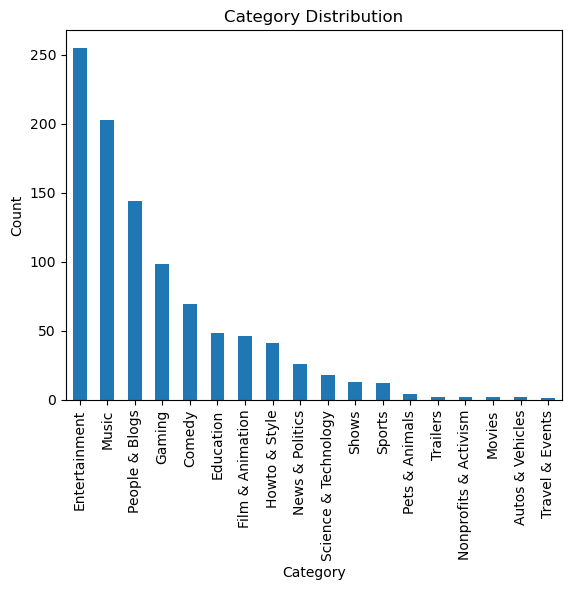

In [19]:
yt_df_cleaned['category'].value_counts().plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [20]:
#Check out some of the channel in entertainment category to get the idea of this category.
yt_df_cleaned[yt_df_cleaned['category'] == 'Entertainment']

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,8.0,5.0,6.0,5.805740e+08,145100.0,2300000.0,1700000.0,27900000.0,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
21,22,Zee TV,70500000,7.313905e+10,Entertainment,Zee TV,129204,India,IN,Entertainment,9.0,6.0,8.0,1.707000e+09,426800.0,6800000.0,5100000.0,81900000.0,900000.0,2005.0,Dec,11.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
36,37,Marshmello,56400000,1.469600e+10,Entertainment,Marshmello,436,United States,US,Music,233.0,11.0,15.0,1.121000e+08,28000.0,448400.0,336300.0,5400000.0,100000.0,2015.0,Apr,6.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
46,47,Get Movies,47500000,3.078868e+10,Entertainment,Get Movies,3322,Russia,RU,Film,35.0,1.0,4.0,3.065400e+08,76600.0,1200000.0,919600.0,14700000.0,700000.0,2006.0,Dec,16.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,963,Family Fitness,12500000,1.038485e+10,Entertainment,Family Fitness,1699,India,IN,Entertainment,413.0,123.0,171.0,2.357150e+08,58900.0,942900.0,707100.0,11300000.0,400000.0,2017.0,Jan,18.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
963,964,Zee Tamil,12500000,1.155219e+10,Entertainment,Zee Tamil,102699,India,IN,Entertainment,342.0,123.0,171.0,3.499400e+08,87500.0,1400000.0,1000000.0,16800000.0,200000.0,2008.0,Aug,26.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
964,965,Flowers Comedy,12500000,1.169108e+10,Entertainment,Flowers Comedy,11907,India,IN,Entertainment,337.0,122.0,170.0,1.800210e+08,45000.0,720100.0,540100.0,8600000.0,100000.0,2015.0,Aug,19.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
976,977,SAAIHALILINTAR,12400000,1.113066e+09,Entertainment,SAAIHALILINTAR,409,Indonesia,ID,Entertainment,10271.0,34.0,172.0,8.060750e+05,202.0,3200.0,2400.0,38700.0,NaN,2012.0,Apr,28.0,36.3,2.702039e+08,4.69,151509724.0,-0.789275,113.921327


#### Insights:
1. The entertainment category contains various type of channel such as Vlog, animation for kids and some of them are actually music channel!
2. Drilling down to how Youtube categorize those channels and impact of category on views might gave us more information on why entertainment is the most popular.

In [21]:
#Average views for each category
Average_views_per_cat = yt_df_cleaned.groupby('category').agg({'video_views_for_the_last_30_days': 'mean'})
Average_views_per_cat = Average_views_per_cat.sort_values(by='video_views_for_the_last_30_days', ascending=False)
Average_views_per_cat = Average_views_per_cat.rename(columns={'video_views_for_the_last_30_days': 'average_views (30days)'})
pd.options.display.float_format = '{:,.2f}'.format
Average_views_per_cat

,average_views (30days)
category,
Shows,"550,166,083.33"
Science & Technology,"439,453,454.18"
Autos & Vehicles,"273,216,500.00"
Sports,"223,417,333.33"
Film & Animation,"210,307,263.68"
Pets & Animals,"200,616,052.00"
Education,"187,304,527.22"
Comedy,"185,310,615.95"
People & Blogs,"180,634,300.24"


Average view of the entertainment is not the highest.

### Other missing column
 For the rest of the columns with missing values, as recovering those would be difficult.
 
 

In [22]:
missing_value = yt_df_cleaned.isnull().sum()
missing_value

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                    115
Abbreviation                               115
channel_type                                27
video_views_rank                             1
country_rank                               109
channel_type_rank                           29
video_views_for_the_last_30_days            50
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               329
created_year                                 5
created_month                                5
created_date 

In [23]:
#Dropping the rest of the missing values
yt_df_cleaned = yt_df_cleaned.dropna()


## Exploratory Data Analysis

##### Subscribers and view counts

I am using 'video_views_for_the_last_30_days' for view counts as it reflecting more on how channal in the list performs.


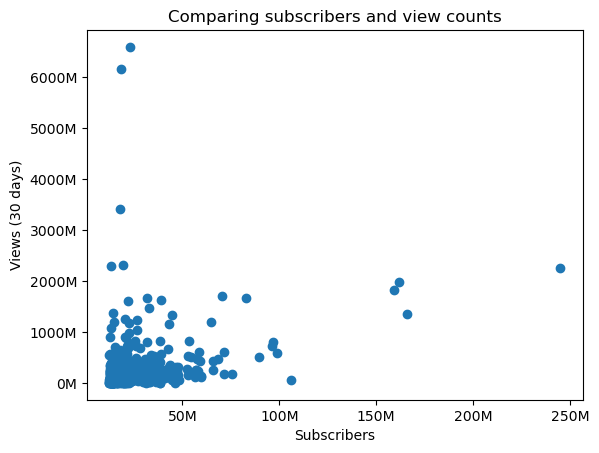

In [24]:
plt.scatter(yt_df_cleaned['subscribers'], yt_df_cleaned['video_views_for_the_last_30_days'])
plt.xlabel('Subscribers')
plt.ylabel('Views (30 days)')
plt.title('Comparing subscribers and view counts')

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

plt.gca().xaxis.set_major_formatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(millions_formatter)


##### Top 10 country with the most Youtuber


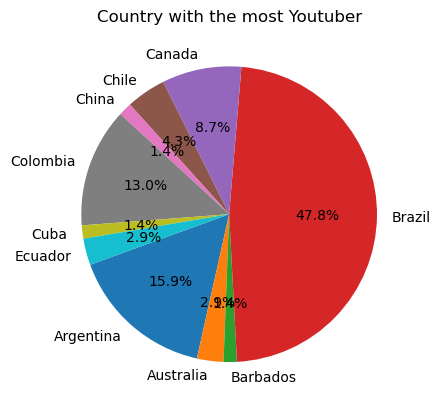

In [25]:
by_country = yt_df_cleaned.groupby('Country').agg({'Country': 'count'})
by_country = by_country.rename(columns={'Country': 'Count'})
by_country.reset_index(inplace=True)
by_country_top_10 = by_country.head(10)

# Extract data from the DataFrame
labels = by_country_top_10['Country']
sizes = by_country_top_10['Count']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
# Add a title
plt.title('Country with the most Youtuber')

# Display the chart
plt.show()

Brazil has the most youtuber in the data.

##### Yearly earning

In [26]:
avg_yearly_earning = (yt_df_cleaned['highest_yearly_earnings'] + yt_df_cleaned['lowest_yearly_earnings']) /2


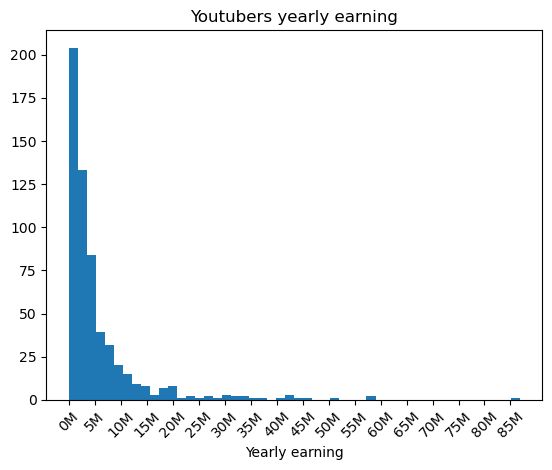

In [27]:
plt.hist(avg_yearly_earning, bins=50)
plt.title('Youtubers yearly earning')
plt.xlabel('Yearly earning')

x_ticks = np.arange(0, max(avg_yearly_earning) / 1e6 + 1, 5)
plt.xticks(x_ticks * 1e6, [f'{x:.0f}M' for x in x_ticks])

plt.xticks(rotation=45)
plt.show()


Youtubers are mostly earning 1M-5M, the most earning is "김프로 KIMPRO" from South Korea with 86.8M average yearly income.

 Note: The currency in the data might not converted into the same currency, which could be the reason that "김프로 KIMPRO" from South Korea is earning the most as 1 USD is equal to around 1,330 South Korean won.

In [33]:
yt_df_cleaned = yt_df_cleaned.copy()
yt_df_cleaned['avg_yearly_earning'] = (yt_df_cleaned['highest_yearly_earnings'] + yt_df_cleaned['lowest_yearly_earnings']) / 2

In [34]:
yt_df_cleaned[yt_df_cleaned['avg_yearly_earning'] == yt_df_cleaned['avg_yearly_earning'].max()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,avg_yearly_earning
495,496,ýýýýýýýýý KIMPRO,17700000,"19,206,701,832.00",People & Blogs,ýýýýýýýýý KIMPRO,1646,South Korea,KR,People,125.00,9.00,26.00,"3,404,000,000.00","850,900.00","13,600,000.00","10,200,000.00","163,400,000.00","3,200,000.00","2,017.00",Nov,11.00,94.30,"51,709,098.00",4.15,"42,106,719.00",35.91,127.77,"86,800,000.00"


## The most popular category

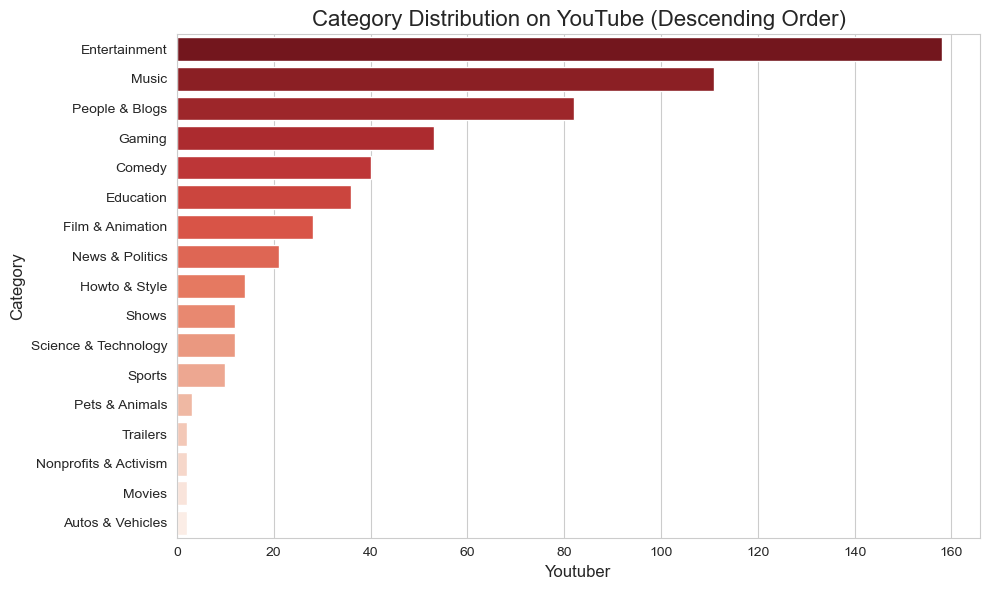

In [30]:
category_counts = yt_df_cleaned['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x=category_counts.values, y=category_counts.index, palette='Reds_r', orient='h')

plt.title('Category Distribution on YouTube (Descending Order)', fontsize=16)
plt.xlabel('Youtuber', fontsize=12)
plt.ylabel('Category', fontsize=12)


plt.tight_layout()
plt.show()

Entertainment is the most popular category! with music, people & blogs and gaming respectively.

## Earning by category


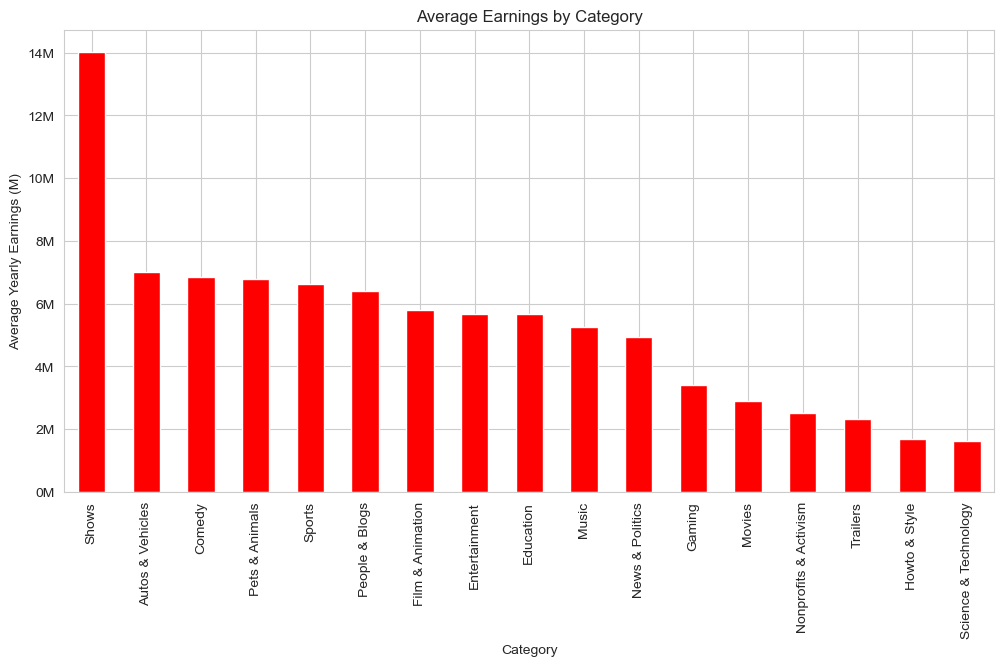

In [31]:
average_earnings_per_category = yt_df_cleaned.groupby('category')['avg_yearly_earning'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
average_earnings_per_category.plot(kind='bar', color='red')

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.title('Average Earnings by Category')
plt.xlabel('Category')
plt.ylabel('Average Yearly Earnings (M)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

While 'Entertainment' is the hottest category, the average yearly earnings for 'Shows' YouTubers are almost double those of the runner-up. And 'Entertainment' is not even in the top 5!

## Correlation between upload, view, subscriber vs earning

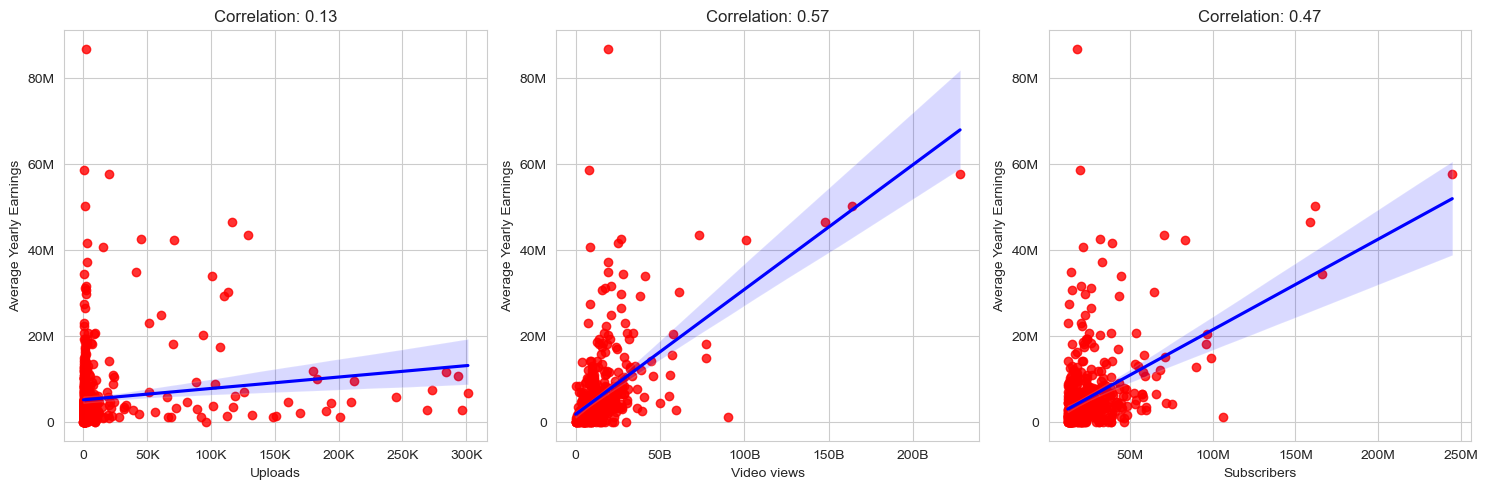

In [32]:
def millions_trillions_formatter(x, pos):
    if x >= 1e9:
        return f'{x / 1e9:.0f}B'
    elif x >= 1e6:
        return f'{x / 1e6:.0f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.0f}K'
    else:
        return f'{x:.0f}'

columns_of_interest = ['uploads', 'video views', 'subscribers', 'avg_yearly_earning']
correlation_df = yt_df_cleaned[columns_of_interest]

plt.figure(figsize=(15, 5))

for i, col in enumerate(columns_of_interest[:-1], 1):
    plt.subplot(1, 3, i)
    sns.regplot(x=col, y='avg_yearly_earning', data=correlation_df, color='red', line_kws={"color": "blue"})
    plt.xlabel(col.capitalize())
    plt.ylabel('Average Yearly Earnings')
    
    corr_coef = correlation_df[col].corr(correlation_df['avg_yearly_earning'])
    plt.title(f'Correlation: {corr_coef:.2f}')
    
    plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(millions_trillions_formatter))
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_trillions_formatter))

plt.tight_layout()
plt.show()